# Maritime Port call and performance Project
>*A data exploration of global port performance using UNCTAD statistics to uncover efficiency trends across vessel types from 2022 to 2023.*

![Maritime Port Banner](https://i.postimg.cc/j5sXKLw2/Port-banner.png)


### Overview:  
This project explores global maritime port performance using data from the`United Nations Conference on Trade and Development` **(UNCTAD)**. It analyzes vessel characteristics, port stay durations and capacity metrics for different vessel types over two half-year periods (2022–2023).

Leveraging Python and Streamlit, I built an interactive dashboard to visualize trends, identify efficiency patterns, and provide insights for shipping stakeholders and maritime policy analysts.

**Key focus areas include:**

- Median time vessels spend in port

- Vessel size and age distribution

- Cargo and container handling capacities

- Variations across vessel types and reporting periods

> *The insights aim to support decisions around port efficiency, infrastructure investment, and sustainability.*

## 👨🏽‍💻 About the Author

**Fijabi J. Adekunle**  
Marine Engineer turned Data Professional  
🔍 Passionate about using data to uncover insights and drive impactful decisions, especially in the maritime and logistics sector.  
🌍 Bridging domain knowledge with data to explore global trade and sustainability.  
📫 Connect with me: [LinkedIn](https://www.linkedin.com/in/fijabi-j-adekunle/) | [GitHub](https://github.com/FijabiAdekunle) | [Portfolio](https://sites.google.com/view/fijabijadekunle/home)


In [2]:
# Standard Libraries
import warnings

# Data Manipulation
import pandas as pd
import numpy as np
import math
import os

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
plt.style.use("ggplot")
warnings.filterwarnings("ignore")

In [3]:
# Let's load our dataset
df = pd.read_csv('Maritime Port Performance Project Dataset.csv',index_col=0)
# Let's check the first few rows of the  dataset
print("\n📌 Preview of First 5 Rows:")
df.head()


📌 Preview of First 5 Rows:


,Economy_Label,CommercialMarket_Label,Average_age_of_vessels_years_Value,Average_age_of_vessels_years_MissingValue,Median_time_in_port_days_Value,Median_time_in_port_days_MissingValue,Average_size_GT_of_vessels_Value,Average_size_GT_of_vessels_MissingValue,Average_cargo_carrying_capacity_dwt_per_vessel_Value,Average_cargo_carrying_capacity_dwt_per_vessel_MissingValue,Average_container_carrying_capacity_TEU_per_container_ship_Value,Average_container_carrying_capacity_TEU_per_container_ship_MissingValue,Maximum_size_GT_of_vessels_Value,Maximum_size_GT_of_vessels_MissingValue,Maximum_cargo_carrying_capacity_dwt_of_vessels_Value,Maximum_cargo_carrying_capacity_dwt_of_vessels_MissingValue,Maximum_container_carrying_capacity_TEU_of_container_ships_Value,Maximum_container_carrying_capacity_TEU_of_container_ships_MissingValue,period
0,World,All ships,18,NaN,1.07,NaN,14285,NaN,25725.0,NaN,3407.0,NaN,236583,NaN,404389.0,NaN,24000.0,NaN,2022-S1
1,World,Liquid bulk carriers,15,NaN,1.00,NaN,16298,NaN,28286.0,NaN,NaN,Not available or not separately reported,170618,NaN,323183.0,NaN,NaN,Not available or not separately reported,2022-S1
2,World,Liquefied petroleum gas carriers,16,NaN,1.03,NaN,10726,NaN,11986.0,NaN,NaN,Not available or not separately reported,60784,NaN,64220.0,NaN,NaN,Not available or not separately reported,2022-S1
3,World,Liquefied natural gas carriers,12,NaN,1.12,NaN,96843,NaN,75614.0,NaN,NaN,Not available or not separately reported,168189,NaN,155159.0,NaN,NaN,Not available or not separately reported,2022-S1
4,World,Dry bulk carriers,14,NaN,2.23,NaN,32735,NaN,58640.0,NaN,NaN,Not available or not separately reported,204014,NaN,404389.0,NaN,NaN,Not available or not separately reported,2022-S1


### Dataset Profilling and Initial Insight

In [5]:
def explore_port_data(df): 
    print('📊 Dataset Overview:')
    print(f'\n✅ Number of Rows: {df.shape[0]}')
    print(f'✅ Number of Columns: {df.shape[1]}')
    print("\n📚 Column Names:")
    print(df.columns.tolist())

    print("-" * 60)

    print('\n📈 Numerical Columns Statistical Summary:')
    print(df.describe(exclude='object'))  

    print("\n🔤 Categorical Columns Statistical Summary:")
    print(df.describe(include='object'))

    print("\n🔍 Data Types & Non-Null Values:")
    print(df.info())

    print("\n🧬 Unique Values per Column:")
    print(df.nunique())

    print(f"\n📛 Duplicate Rows: {df.duplicated().sum()}")

    print("\n❓ Missing Values per Column:")
    missing = df.isnull().sum()
    missing = missing[missing > 0].sort_values(ascending=False)
    print(missing)

    return

In [6]:
explore_port_data(df)

📊 Dataset Overview:

✅ Number of Rows: 803
✅ Number of Columns: 19

📚 Column Names:
['Economy_Label', 'CommercialMarket_Label', 'Average_age_of_vessels_years_Value', 'Average_age_of_vessels_years_MissingValue', 'Median_time_in_port_days_Value', 'Median_time_in_port_days_MissingValue', 'Average_size_GT_of_vessels_Value', 'Average_size_GT_of_vessels_MissingValue', 'Average_cargo_carrying_capacity_dwt_per_vessel_Value', 'Average_cargo_carrying_capacity_dwt_per_vessel_MissingValue', 'Average_container_carrying_capacity_TEU_per_container_ship_Value', 'Average_container_carrying_capacity_TEU_per_container_ship_MissingValue', 'Maximum_size_GT_of_vessels_Value', 'Maximum_size_GT_of_vessels_MissingValue', 'Maximum_cargo_carrying_capacity_dwt_of_vessels_Value', 'Maximum_cargo_carrying_capacity_dwt_of_vessels_MissingValue', 'Maximum_container_carrying_capacity_TEU_of_container_ships_Value', 'Maximum_container_carrying_capacity_TEU_of_container_ships_MissingValue', 'period']
----------------------

### Data Cleaning

In [8]:
# We will create a function for Data Cleaning 

def clean_port_performance_data(df):
    print("Cleaning started...\n")
    
    # 1. Dropping all columns that end with 'MissingValue'
    missing_cols = [col for col in df.columns if "MissingValue" in col]
    df.drop(columns=missing_cols, inplace=True)
    print(f"✅ Dropped {len(missing_cols)} '_MissingValue' columns")
    
    # 2. Replace placeholder strings with proper NaN
    placeholder = "Not available or not separately reported"
    df.replace(placeholder, pd.NA, inplace=True)
    print(f"✅ Replaced placeholder text with NaN")
    
    # 3. Convert all '_Value' columns to numeric
    value_cols = [col for col in df.columns if "_Value" in col]
    for col in value_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    print(f"✅ Converted {len(value_cols)} '_Value' columns to numeric")
    
    # 4. Calculate missing value percentages
    missing_percent = df.isnull().mean() * 100
    print("\nMissing value percentages before treatment:")
    print(missing_percent.sort_values(ascending=False))
    
    # 5. Drop columns with high missing values (>50%)
    high_missing_cols = missing_percent[missing_percent > 50].index.tolist()
    df.drop(columns=high_missing_cols, inplace=True)
    print(f"\n✅ Dropped {len(high_missing_cols)} columns with >50% missing values: {high_missing_cols}")
    
    # 6. Impute median for columns with lower missing percentages
    low_missing_cols = missing_percent[(missing_percent > 0) & (missing_percent <= 50)].index.tolist()
    for col in low_missing_cols:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
    print(f"✅ Imputed median for {len(low_missing_cols)} columns with ≤50% missing values: {low_missing_cols}")
    
    # 7. Final missing value check
    print("\nMissing value percentages after treatment:")
    print(df.isnull().mean().sort_values(ascending=False))
    
    print("\n✅ Cleaning complete!")
    return df

In [9]:
df_cleaned = clean_port_performance_data(df)
df_cleaned.head(2)

Cleaning started...

✅ Dropped 8 '_MissingValue' columns
✅ Replaced placeholder text with NaN
✅ Converted 8 '_Value' columns to numeric

Missing value percentages before treatment:
Average_container_carrying_capacity_TEU_per_container_ship_Value    77.085928
Maximum_container_carrying_capacity_TEU_of_container_ships_Value    77.085928
Average_cargo_carrying_capacity_dwt_per_vessel_Value                22.914072
Maximum_cargo_carrying_capacity_dwt_of_vessels_Value                22.914072
Median_time_in_port_days_Value                                      22.415940
Economy_Label                                                        0.000000
CommercialMarket_Label                                               0.000000
Average_age_of_vessels_years_Value                                   0.000000
Average_size_GT_of_vessels_Value                                     0.000000
Maximum_size_GT_of_vessels_Value                                     0.000000
period                                 

,Economy_Label,CommercialMarket_Label,Average_age_of_vessels_years_Value,Median_time_in_port_days_Value,Average_size_GT_of_vessels_Value,Average_cargo_carrying_capacity_dwt_per_vessel_Value,Maximum_size_GT_of_vessels_Value,Maximum_cargo_carrying_capacity_dwt_of_vessels_Value,period
0,World,All ships,18,1.07,14285,25725.0,236583,404389.0,2022-S1
1,World,Liquid bulk carriers,15,1.00,16298,28286.0,170618,323183.0,2022-S1


In [10]:
# Let's rename the columns for clearity
df_cleaned.columns = [
    'economy_label',
    'vessel_type',           
    'avg_vessel_age', 
    'median_time_in_port', 
    'avg_size_GT', 
    'avg_cargo_capacity_DWT',  
    'max_size_GT', 
    'max_cargo_capacity_DWT', 
    'period']

# Also we need to rename 'All SHIPS' value in the Vessel Type Column to All_Vessel_Types 
df['vessel_type'] = df['vessel_type'].replace({'All ships': 'All_Vessel_Types'})



### Exploratory Data Analysis (EDA)

### Univariant Analysis 


In [13]:
# Univariant Analysis Function 
def num_cols_univariant_plots(df_cleaned): 
    print('📌 Distribution of Numerical Columns')
    numerical_cols = df_cleaned.select_dtypes(include='number')
    
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(numerical_cols.columns):
        plt.subplot(3, 4, i + 1)
        df_cleaned[col].hist(bins=30, color='orangered')
        plt.title(col)
    plt.tight_layout()
    plt.suptitle('Distribution of Numerical Columns', fontsize=16, y=1.02)
    plt.savefig('Distribution_of_Numerical_Columns.png')
    plt.show()

    print('\n📌 Numerical Columns Boxplot:')
    plt.figure(figsize=(15,10))
    sns.boxplot(data=numerical_cols, orient='h', palette='Set2')
    plt.title('Numerical Columns Boxplot')
    plt.savefig('Numerical_Columns_Boxplot.png')
    plt.show()

    return
  

📌 Distribution of Numerical Columns


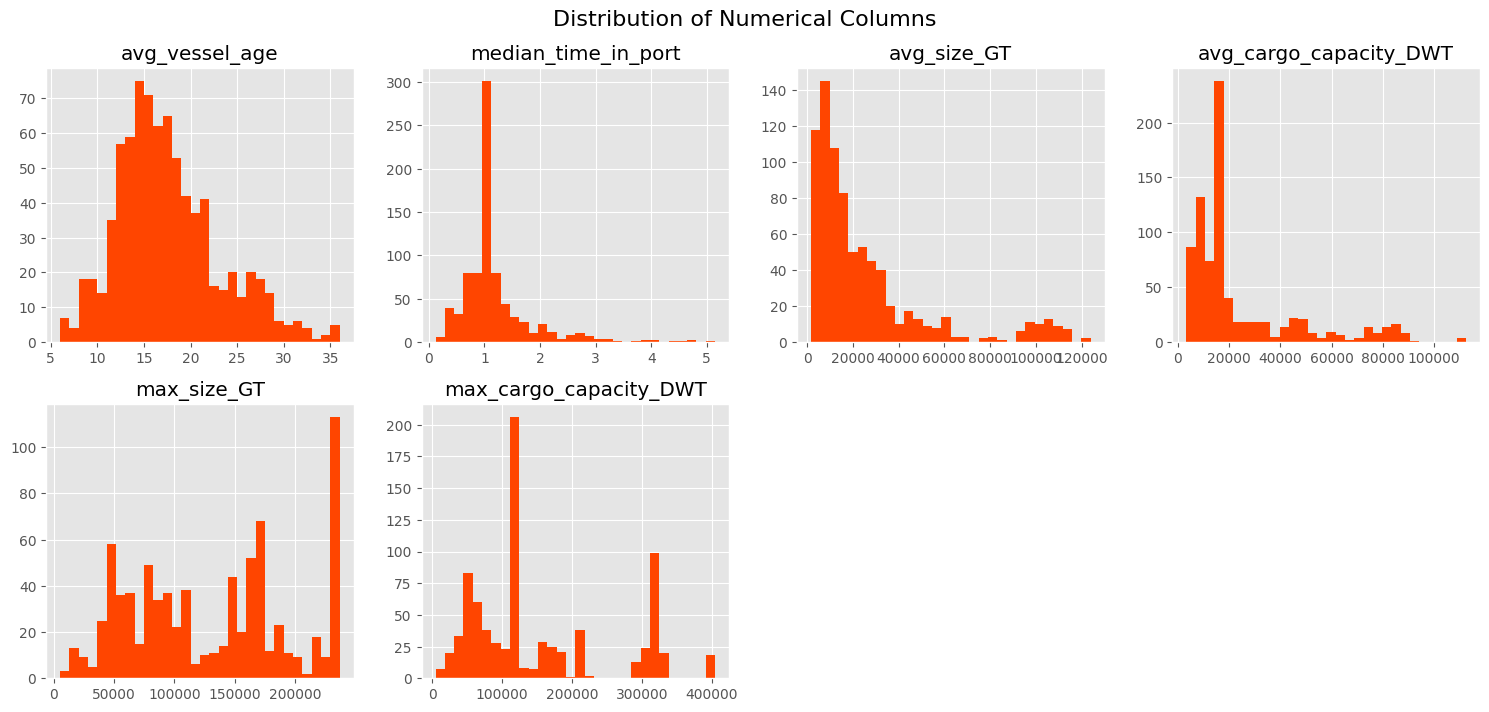


📌 Numerical Columns Boxplot:


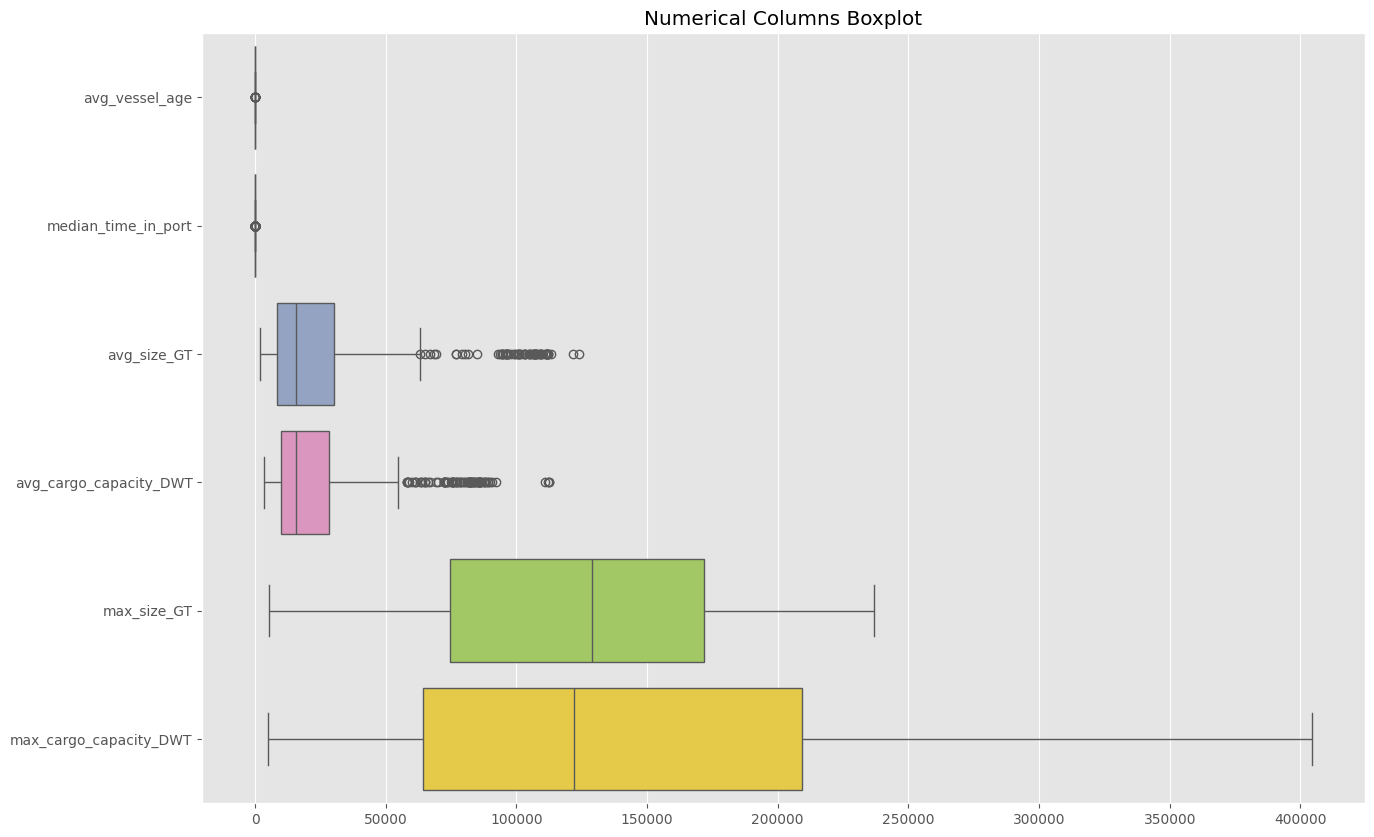

In [14]:
num_cols_univariant_plots(df_cleaned)

In [15]:
# Function for Categorical Column Univariant Plots
def cat_cols_univariant_plots(df_cleaned): 
    print('📌 Distribution of Categorical Columns')

    categorical_cols = df_cleaned.select_dtypes(include='object').columns

    for col in categorical_cols:
        plt.figure(figsize=(8, 5))
        sns.countplot(data=df_cleaned, x=col, order=df_cleaned[col].value_counts().index, palette='Set3')
        plt.title(f'Distribution of {col}', fontsize=14)
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.savefig(f'Distribution_of_{col}.png')
        plt.show()


📌 Distribution of Categorical Columns


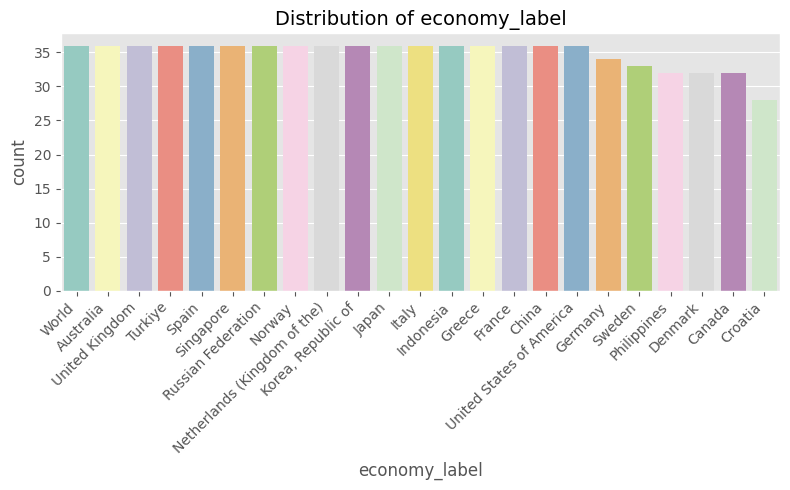

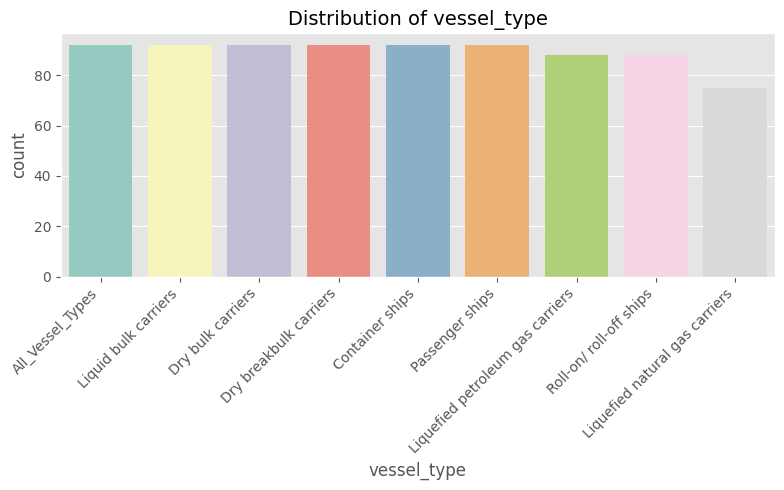

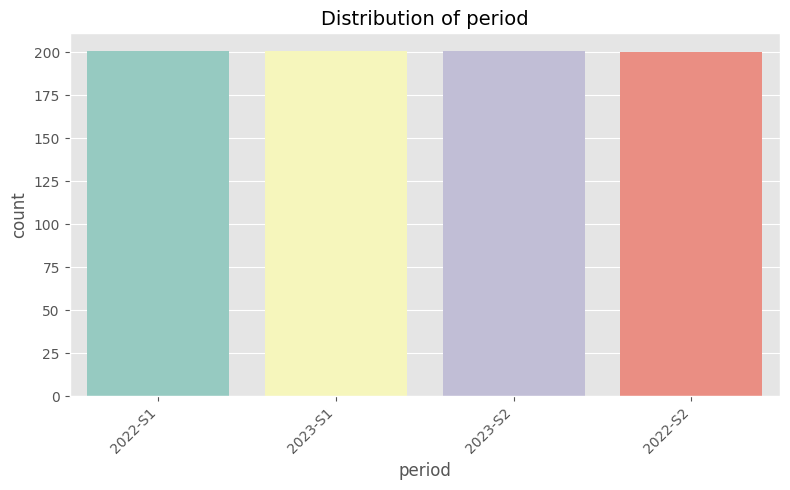

In [16]:
cat_cols_univariant_plots(df_cleaned)

##### Bivariant Analysis

In [18]:
#  Function for Bivariate Analysis 

def bivariate_analysis(df, save_dir='bivariate_plots'):
    os.makedirs(save_dir, exist_ok=True)

    print("📌 Bivariate Analysis: Numerical vs Numerical")
    num_cols = df.select_dtypes(include='number').columns

    # Scatterplots 
    n = len(num_cols)
    fig, axes = plt.subplots(math.ceil((n*(n-1))/2 / 4), 4, figsize=(20, 4 * math.ceil((n*(n-1))/2 / 4)))
    axes = axes.flatten()
    plot_idx = 0

    for i in range(len(num_cols)):
        for j in range(i + 1, len(num_cols)):
            sns.scatterplot(ax=axes[plot_idx], x=df[num_cols[i]], y=df[num_cols[j]], color='steelblue')
            axes[plot_idx].set_title(f'{num_cols[i]} vs {num_cols[j]}')
            axes[plot_idx].set_xlabel(num_cols[i])
            axes[plot_idx].set_ylabel(num_cols[j])
            plot_idx += 1

    plt.tight_layout()
    plt.savefig(f'{save_dir}/Scatterplots_Num_vs_Num.png')
    plt.show()

    print("📌 Correlation Heatmap")
    plt.figure(figsize=(12, 10))
    sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
    plt.title("Correlation Heatmap")
    plt.tight_layout()
    plt.savefig(f'{save_dir}/Correlation_Heatmap.png')
    plt.show()

     # Focused Boxplots
    selected_cols = ['median_time_in_port', 'avg_size_GT']

    print("\n📌 Selected Numerical vs Vessel_Type (Boxplots):")
    for col in selected_cols:
        plt.figure(figsize=(10, 5))
        sns.boxplot(x='vessel_type', y=col, data=df)
        plt.xticks(rotation=45)
        plt.title(f'{col} by Vessel Type')
        plt.tight_layout()
        plt.savefig(f'{col}_by_Vessel_Type.png')
        plt.show()

    print("\n📌 Selected Numerical vs Period (Boxplots):")
    for col in selected_cols:
        plt.figure(figsize=(10, 5))
        sns.boxplot(x='period', y=col, data=df)
        plt.xticks(rotation=45)
        plt.title(f'{col} by Period')
        plt.tight_layout()
        plt.savefig(f'{col}_by_Period.png')
        plt.show()

    return

  

📌 Bivariate Analysis: Numerical vs Numerical


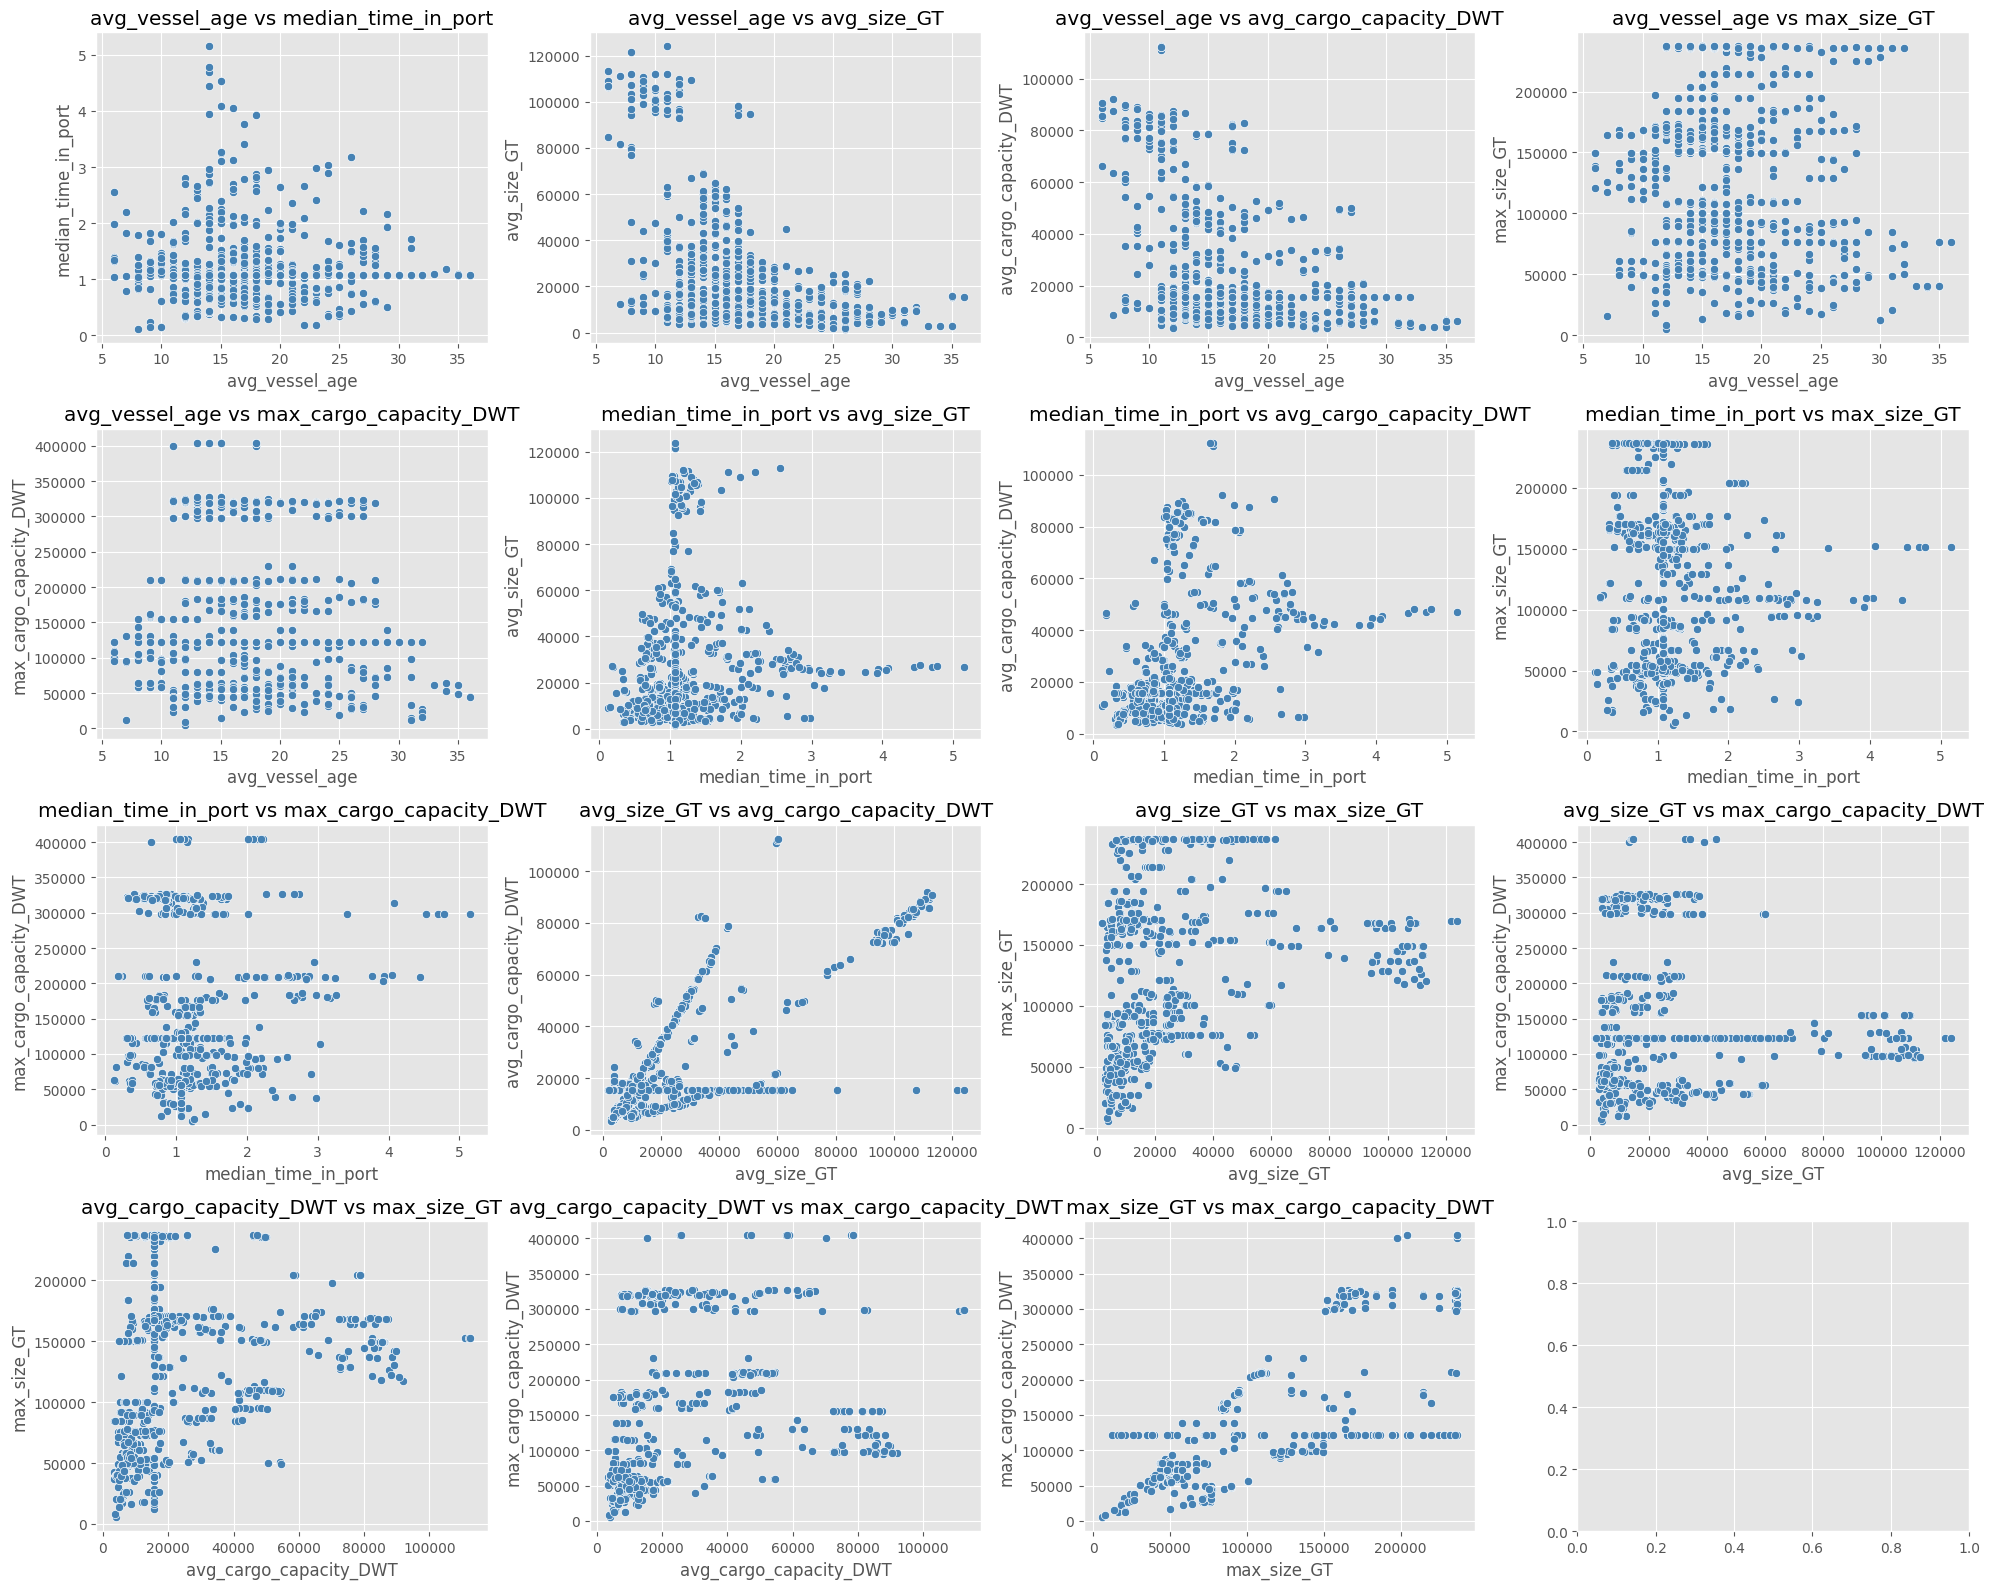

📌 Correlation Heatmap


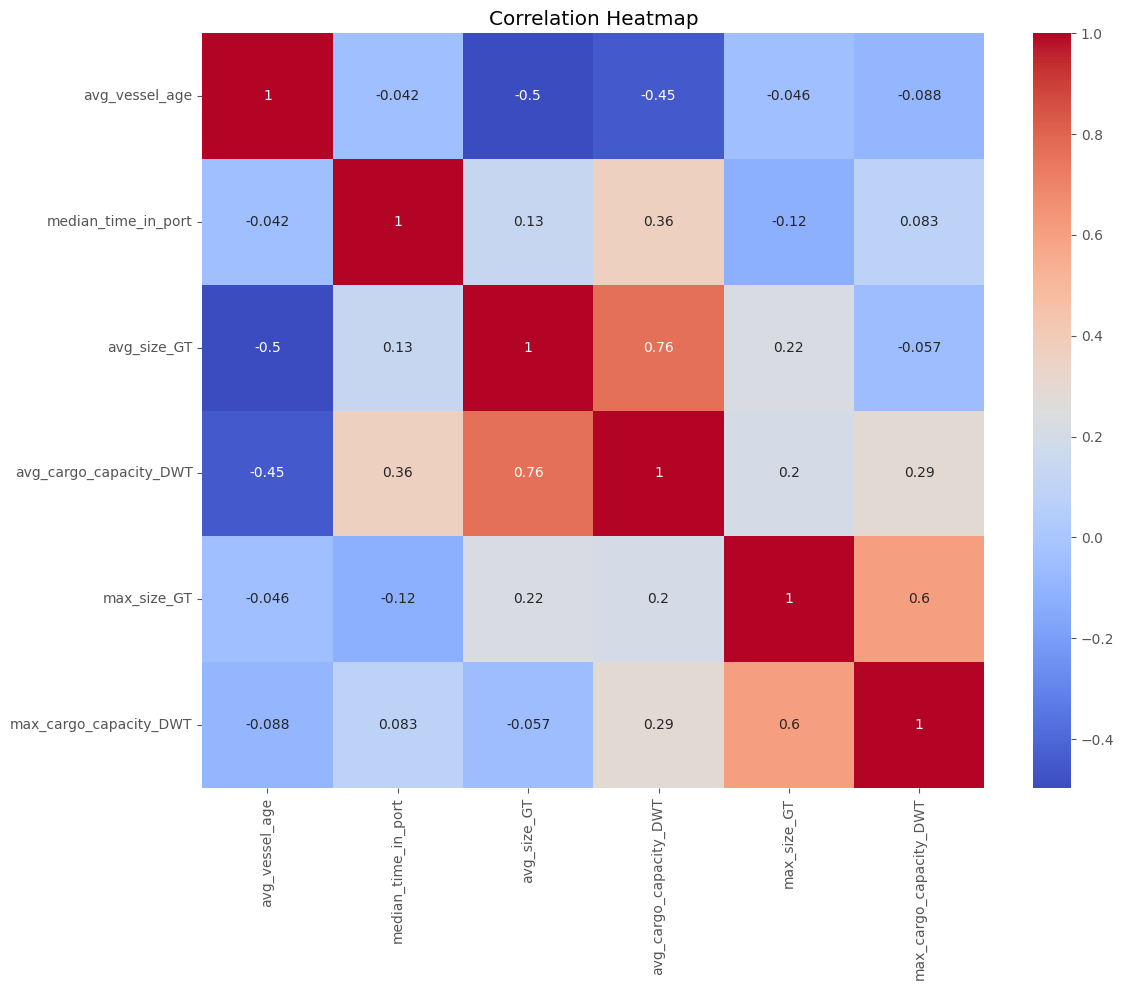


📌 Selected Numerical vs Vessel_Type (Boxplots):


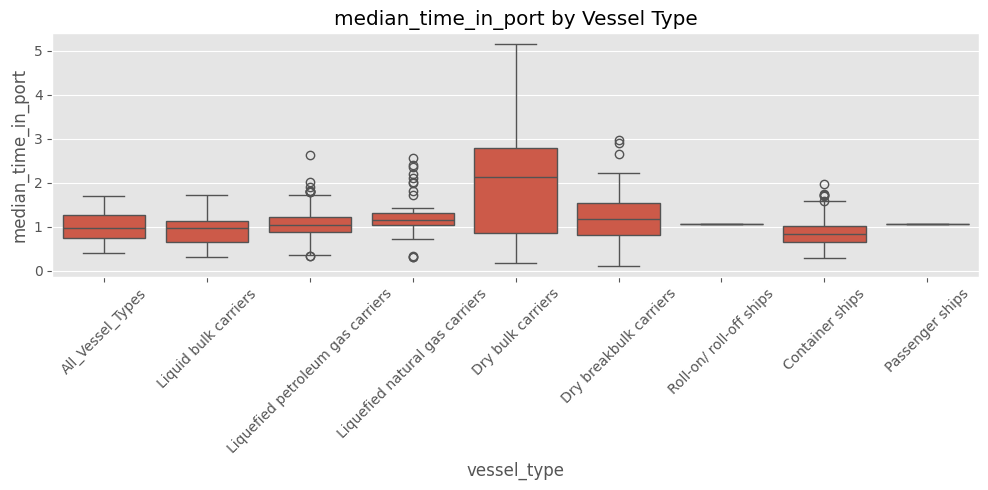

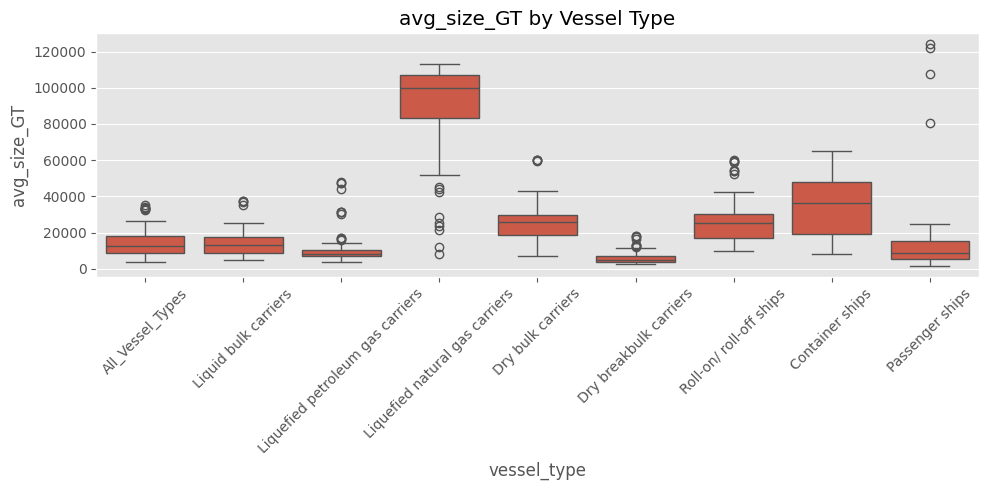


📌 Selected Numerical vs Period (Boxplots):


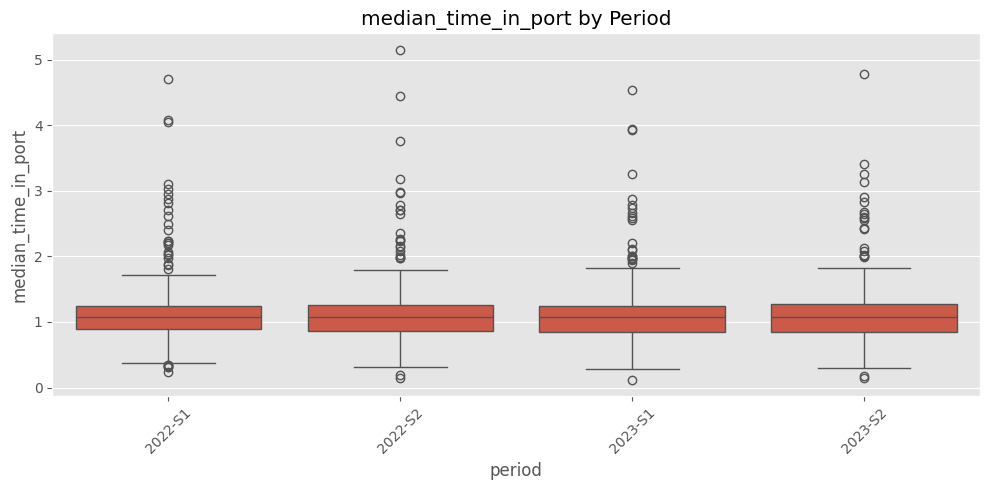

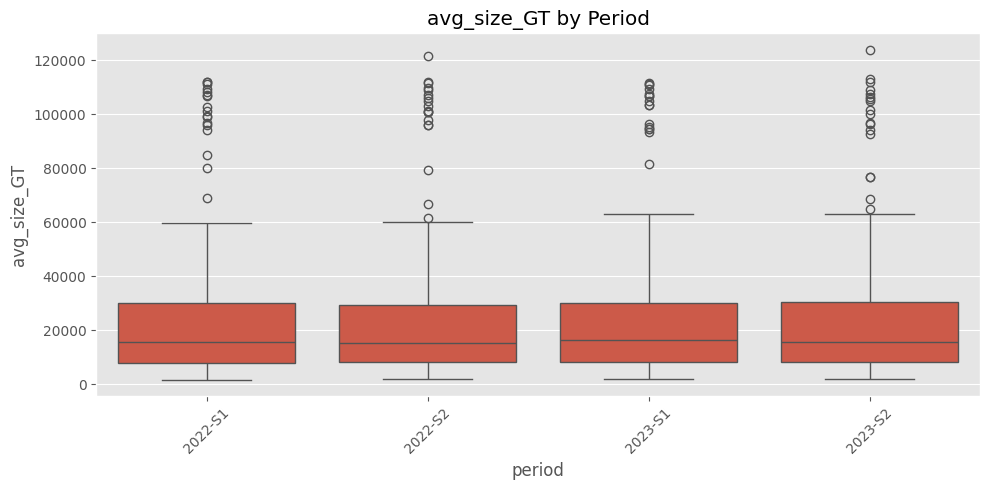

In [19]:
bivariate_analysis(df)

### ⚓️ Insights from EDA

1. **Vessel Age & Size:**

- Most vessels range between 6 and 36 years old, with larger vessels tending to be older.

- Significant variation exists in gross tonnage (GT) and cargo capacities across vessel types, indicating diverse design and operational profiles.

2. **Median Time in Port**

- Container ships and LNG carriers exhibit faster turnaround times in ports, while Dry Bulk and Breakbulk carriers tend to stay longer.

- The first half of 2023 (2023-S1) experienced slightly longer port times, potentially reflecting global logistics disruptions or port congestion.

3. **Correlation Insights**

- A strong positive correlation (0.76) is observed between `avg_size_GT` and `avg_cargo_capacity_DWT` as well as `avg_cargo_capacity_DWT`, indicating consistent design scaling.

- Similarly, a moderately strong correlation of 0.60 exists between `max_size_GT` and `max_cargo_capacity_DWT`, reinforcing the relationship between vessel size and cargo handling capacity.

4. **Period Trends**

- Performance metrics across vessel types remained relatively stable between 2022 and 2023, though minor seasonal variations are present.

### 📌 Summary of Findings
*This dataset provides meaningful insights into maritime port performance from 2022 to 2023. Vessel characteristics such as age, size, and cargo capacity vary significantly by ship type, directly impacting port efficiency metrics like median time in port. Strong correlations between vessel dimensions and cargo capacities suggest design consistency within ship classes.*

> These findings are critical for understanding port utilization, vessel turnaround efficiency, and shifts in operational patterns over time.

### Future Work
- **Clustering or Segmentation:** Apply unsupervised machine learning (e.g., K-Means clustering) to identify vessel clusters based on size, port time, and capacity.

- **Performance Benchmarking:** Integrate external data (e.g., port throughput, trade volume) to benchmark port performance against global standards.

- **Geospatial Analysis:** Add port location data to visualize regional trends and identify potential logistical bottlenecks.

- **Predictive Modeling:** Explore regression models to estimate time in port based on vessel specifications and period data.

### 📢 Call to Action (CTA)
This project lays a strong foundation for further maritime data analytics and can serve port authorities, shipping companies, and trade analysts in making data-driven decisions.

#### ➡️ Next Steps:

- 🚢 Dive into the [**interactive Streamlit dashboard**](https://maritime-port-performance-app-app-chxb78zq8crbdjwxfp8zp6.streamlit.app/) to explore trends in vessel age, size, and port performance across 2022–2023.

- Fork the [GitHub Repository](https://github.com/FijabiAdekunle/Maritime-Port-Performance-Project) and try building your own dashboard with enhanced features.

- Share feedback or ideas for collaboration — let’s improve port analytics together!



In [41]:
df_cleaned.to_csv('cleaned_port_performance_dataset_2022_2023.csv')